In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
!pip install cyvcf2

In [66]:
from cyvcf2 import VCF
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Variants only in hc_bed_filtered:  357
Variants only in norecal-bowtie-somaticsniper:  1602
Variants present in both:  804


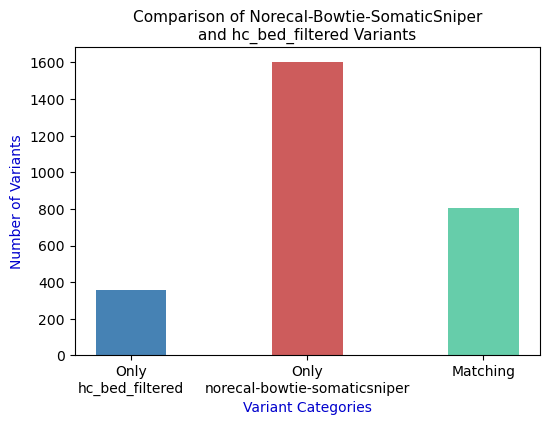

Precision:  0.3341645885286783
Recall:  0.6925064599483204
F1 Score:  0.45079899074852814
Accuracy:  0.2909880564603692


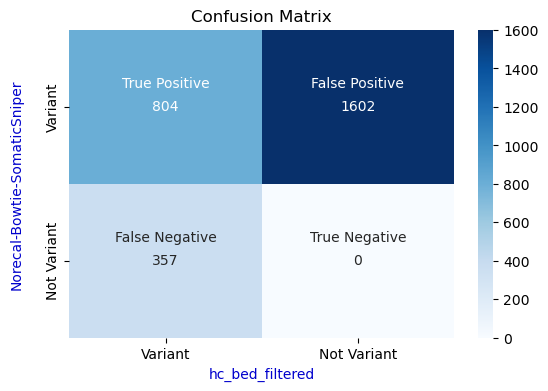

In [67]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./somatic/norecal-bowtie-somaticsniper-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bowtie-somaticsniper: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bowtie-somaticsniper", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bowtie-SomaticSniper\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)

confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])
   
plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bowtie-SomaticSniper\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  380
Variants only in recal-bowtie-somaticsniper:  971
Variants present in both:  781


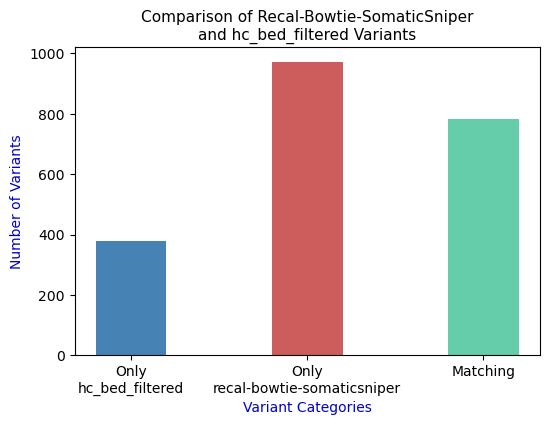

Precision:  0.4457762557077626
Recall:  0.6726959517657192
F1 Score:  0.5362169584620666
Accuracy:  0.36632270168855535


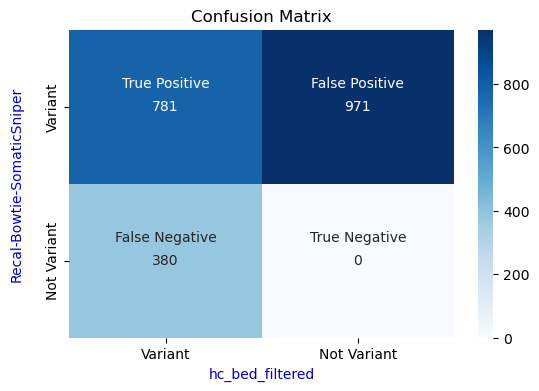

In [68]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./somatic/recal-bowtie-somaticsniper-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bowtie-somaticsniper: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bowtie-somaticsniper", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Recal-Bowtie-SomaticSniper\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])
     
plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bowtie-SomaticSniper\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  291
Variants only in norecal-bwa-somaticsniper:  2019
Variants present in both:  870


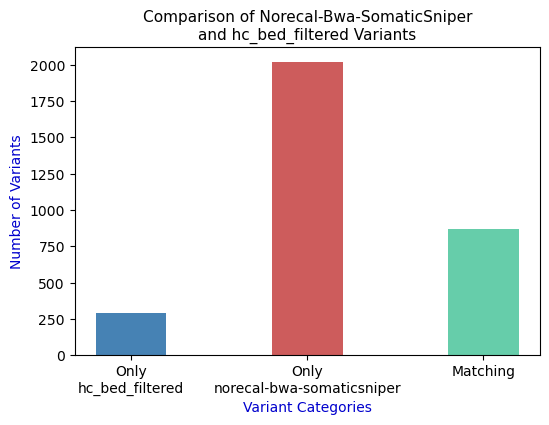

Precision:  0.3011422637590862
Recall:  0.7493540051679587
F1 Score:  0.42962962962962964
Accuracy:  0.27358490566037735


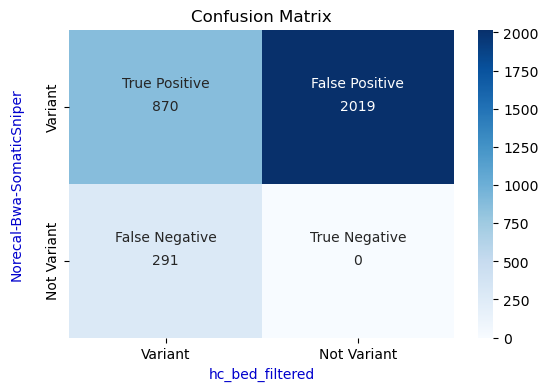

In [69]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./somatic/norecal-bwa-somaticsniper-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bwa-somaticsniper: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bwa-somaticsniper", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bwa-SomaticSniper\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bwa-SomaticSniper\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  307
Variants only in recal-bwa-strelka:  1458
Variants present in both:  854


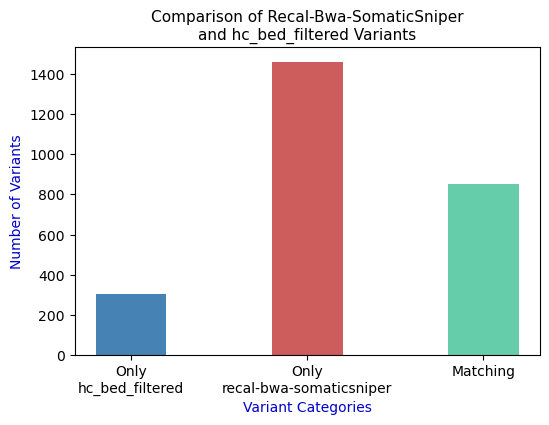

Precision:  0.3693771626297578
Recall:  0.73557278208441
F1 Score:  0.49179383818024763
Accuracy:  0.3260786559755632


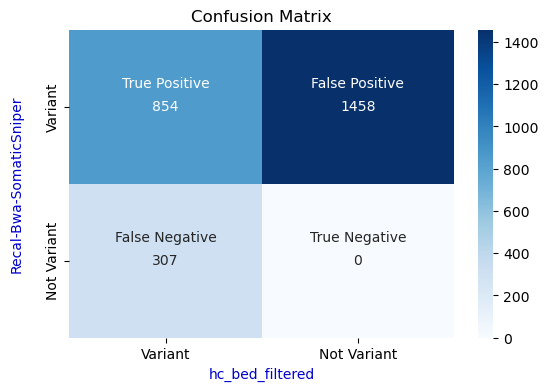

In [70]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./somatic/recal-bwa-somaticsniper-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bwa-strelka: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bwa-somaticsniper", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Recal-Bwa-SomaticSniper\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])
   
plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bwa-SomaticSniper\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  330
Variants only in norecal-bowtie-strelka:  482
Variants present in both:  831


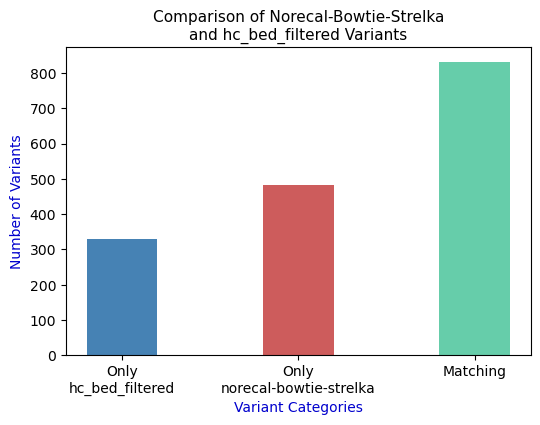

Precision:  0.6329017517136329
Recall:  0.7157622739018088
F1 Score:  0.67178658043654
Accuracy:  0.5057821059038344


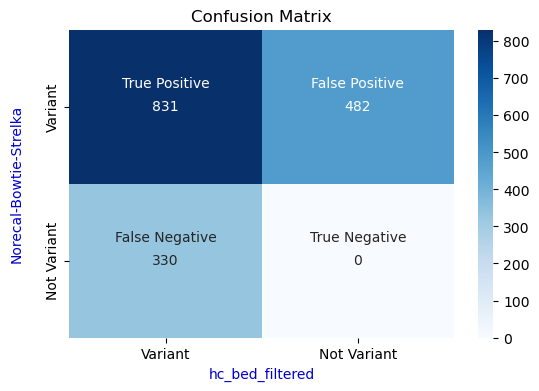

In [71]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./strelka/norecal-bowtie-strelka-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bowtie-strelka: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bowtie-strelka", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bowtie-Strelka\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])
   
plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bowtie-Strelka\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  335
Variants only in recal-bowtie-strelka:  347
Variants present in both:  826


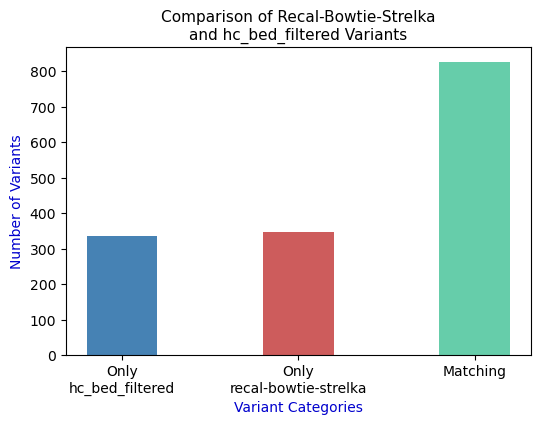

Precision:  0.7041773231031543
Recall:  0.7114556416881999
F1 Score:  0.7077977720651243
Accuracy:  0.5477453580901857


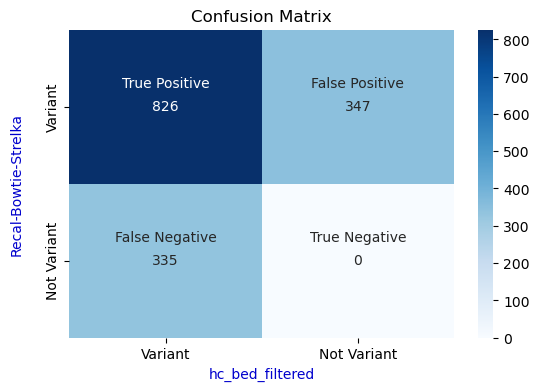

In [72]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./strelka/recal-bowtie-strelka-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bowtie-strelka: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bowtie-strelka", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Recal-Bowtie-Strelka\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])
   
plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bowtie-Strelka\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  218
Variants only in norecal-bwa-strelka:  1258
Variants present in both:  943


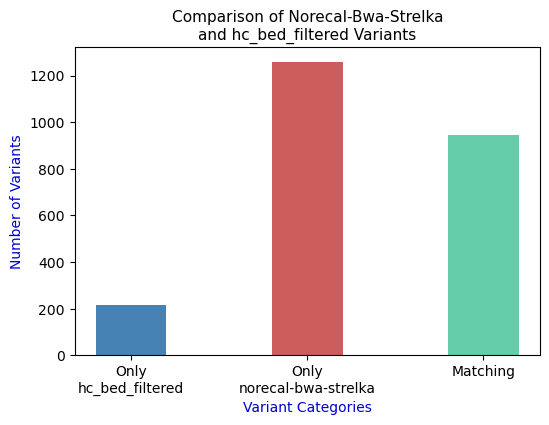

Precision:  0.4284416174466152
Recall:  0.8122308354866494
F1 Score:  0.5609756097560975
Accuracy:  0.3898305084745763


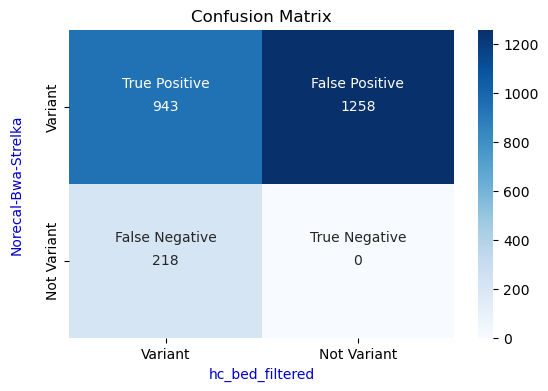

In [73]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./strelka/norecal-bwa-strelka-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bwa-strelka: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bwa-strelka", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bwa-Strelka\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bwa-Strelka\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  225
Variants only in recal-bwa-strelka:  988
Variants present in both:  936


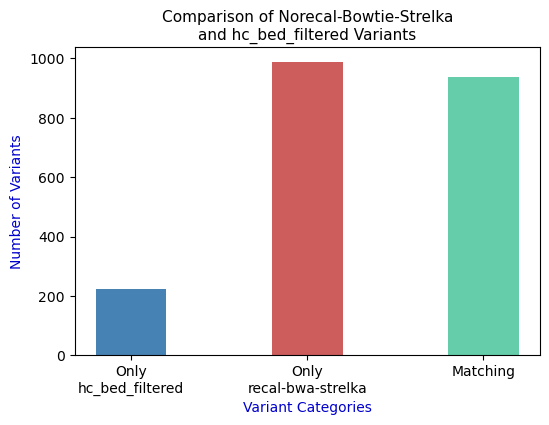

Precision:  0.4864864864864865
Recall:  0.8062015503875969
F1 Score:  0.606807131280389
Accuracy:  0.4355514192647743


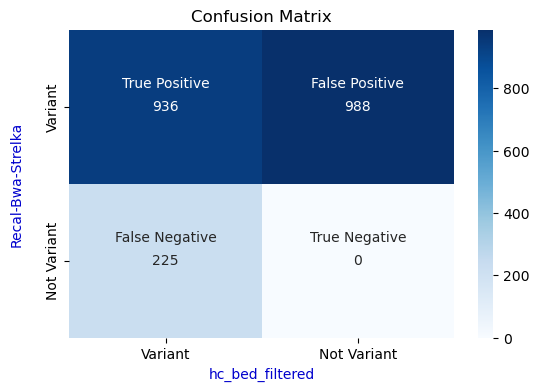

In [74]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./strelka/recal-bwa-strelka-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bwa-strelka: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bwa-strelka", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bowtie-Strelka\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bwa-Strelka\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  952
Variants only in norecal-bowtie-mutect:  24
Variants present in both:  209


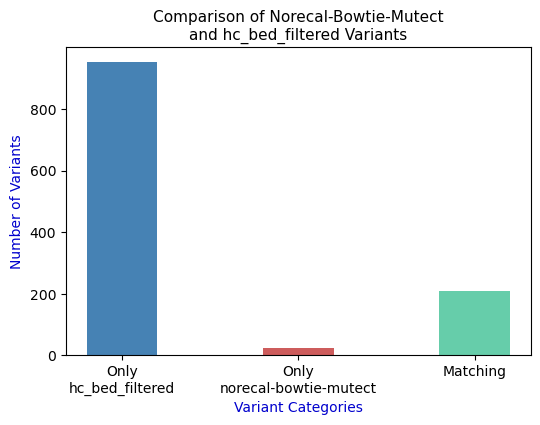

Precision:  0.8969957081545065
Recall:  0.18001722652885443
F1 Score:  0.2998565279770445
Accuracy:  0.17637130801687764


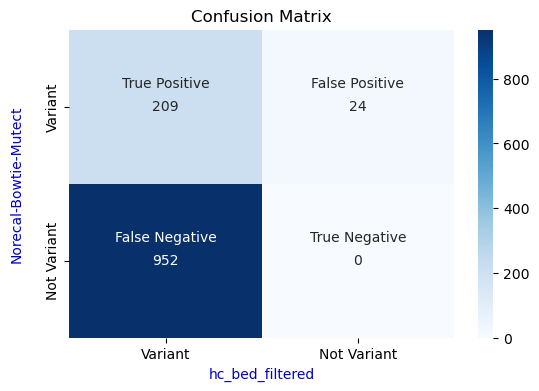

In [75]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect/norecal-bowtie-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bowtie-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bowtie-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bowtie-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bowtie-Mutect\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  297
Variants only in norecal-bowtie-mutect:  101
Variants present in both:  864


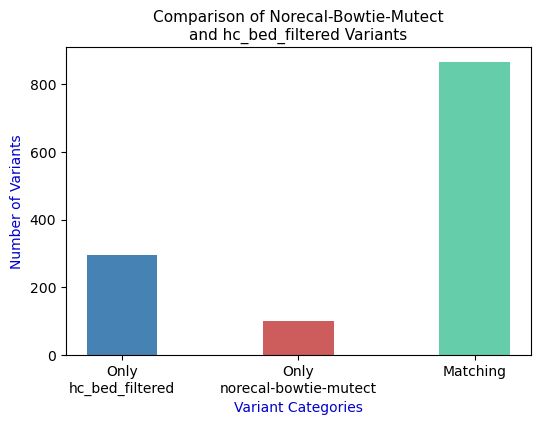

Precision:  0.8953367875647669
Recall:  0.7441860465116279
F1 Score:  0.812793979303857
Accuracy:  0.6846275752773375


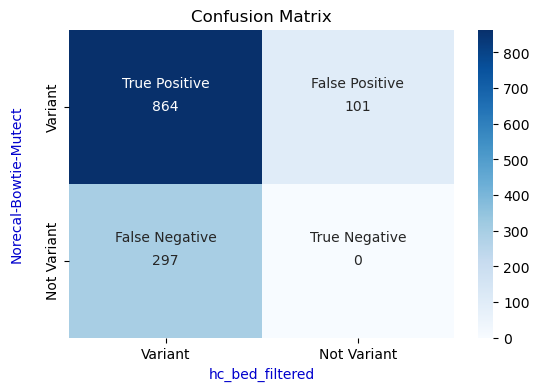

In [76]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect2/norecal-bowtie-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bowtie-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bowtie-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bowtie-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bowtie-Mutect\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  877
Variants only in recal-bowtie-mutect:  40
Variants present in both:  284


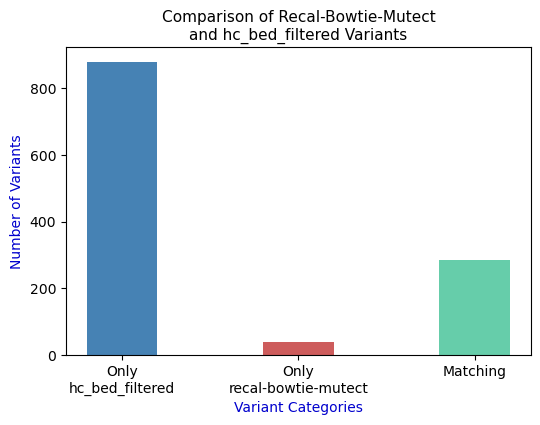

Precision:  0.8765432098765432
Recall:  0.2446167097329888
F1 Score:  0.38249158249158244
Accuracy:  0.23646960865945046


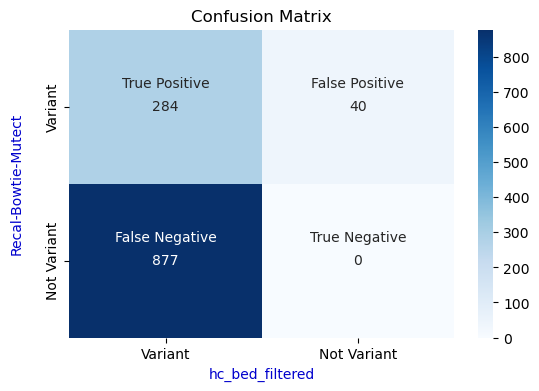

In [77]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect/recal-bowtie-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bowtie-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bowtie-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Recal-Bowtie-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bowtie-Mutect\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  301
Variants only in recal-bowtie-mutect:  78
Variants present in both:  860


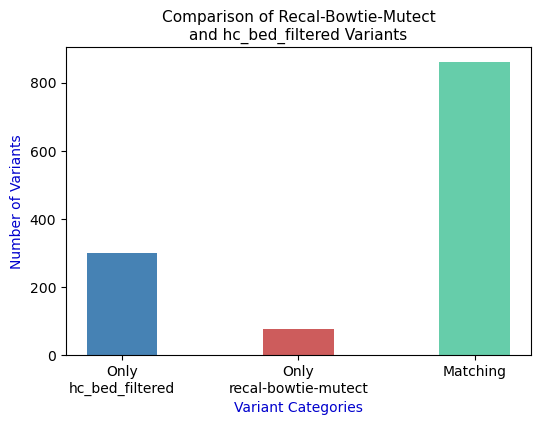

Precision:  0.9168443496801706
Recall:  0.7407407407407407
F1 Score:  0.8194378275369223
Accuracy:  0.6941081517352704


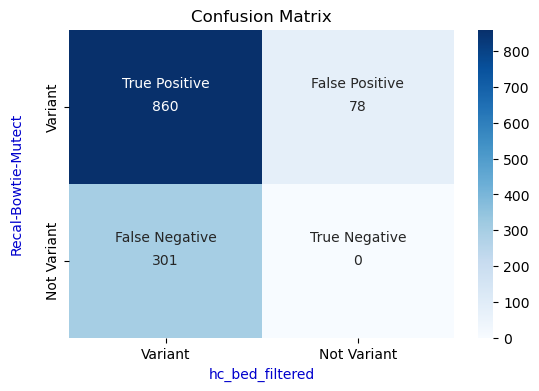

In [78]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect2/recal-bowtie-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bowtie-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bowtie-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Recal-Bowtie-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bowtie-Mutect\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  927
Variants only in norecal-bwa-mutect:  41
Variants present in both:  234


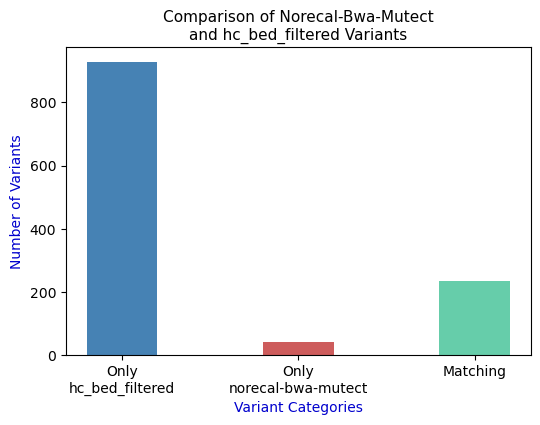

Precision:  0.850909090909091
Recall:  0.20155038759689922
F1 Score:  0.32590529247910865
Accuracy:  0.194675540765391


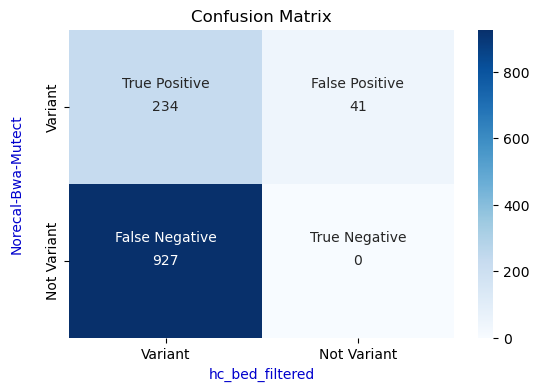

In [79]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect/norecal-bwa-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bwa-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bwa-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bwa-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bwa-Mutect\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  259
Variants only in norecal-bwa-mutect:  167
Variants present in both:  902


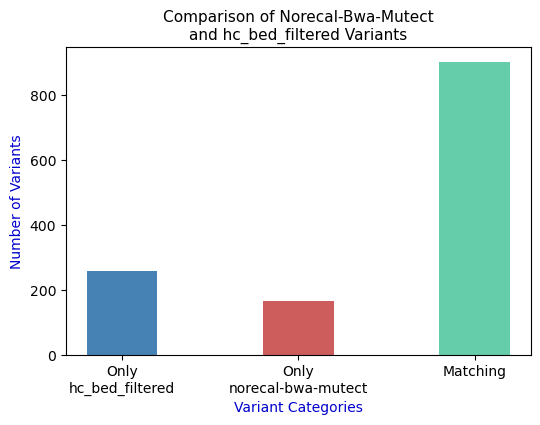

Precision:  0.8437792329279701
Recall:  0.7769164513350559
F1 Score:  0.8089686098654708
Accuracy:  0.6792168674698795


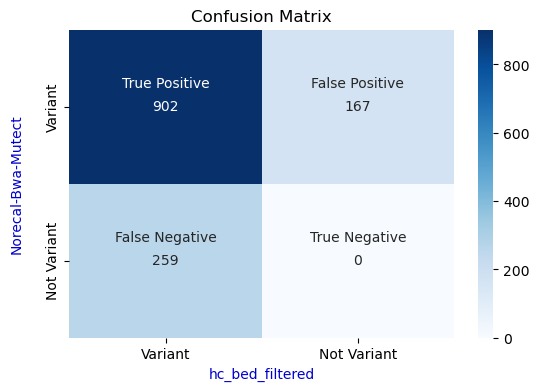

In [80]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect2/norecal-bwa-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bwa-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bwa-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bwa-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Norecal-Bwa-Mutect\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  900
Variants only in recal-bwa-mutect:  61
Variants present in both:  261


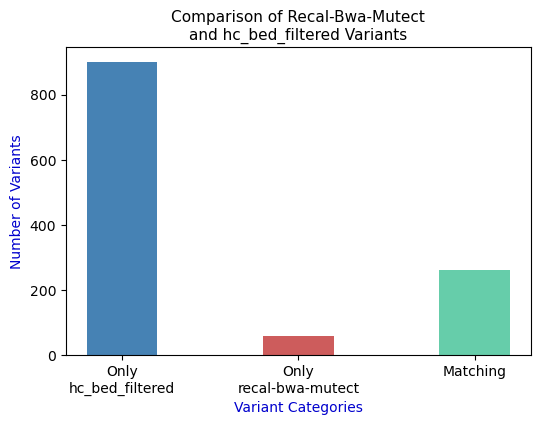

Precision:  0.8105590062111802
Recall:  0.2248062015503876
F1 Score:  0.3519892110586649
Accuracy:  0.21358428805237317


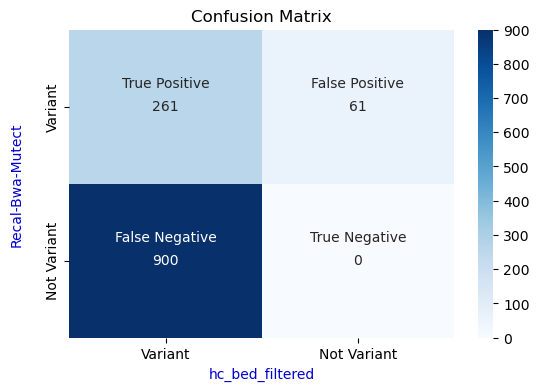

In [81]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect/recal-bwa-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bwa-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bwa-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Recal-Bwa-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bwa-Mutect\n', color='mediumblue')
plt.show()

Variants only in hc_bed_filtered:  260
Variants only in recal-bwa-mutect:  145
Variants present in both:  901


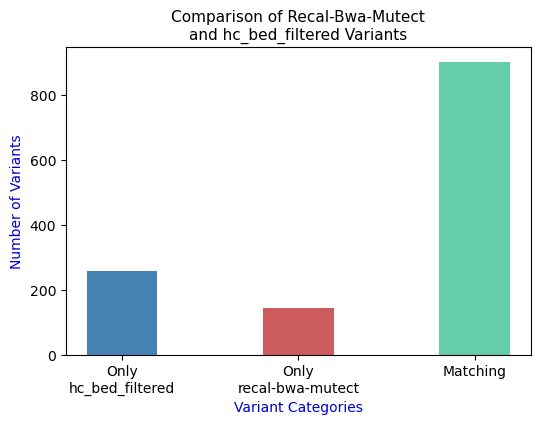

Precision:  0.861376673040153
Recall:  0.7760551248923342
F1 Score:  0.8164929768917083
Accuracy:  0.6898928024502297


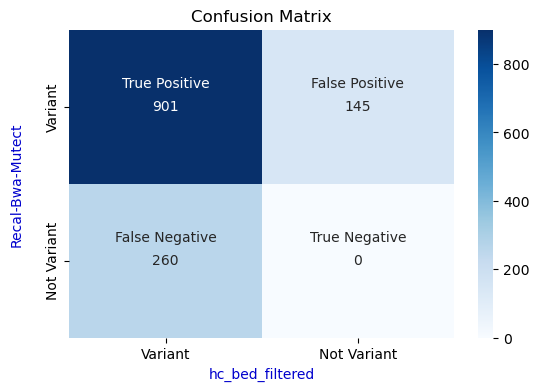

In [82]:
vcf_hc = VCF('hc_bed_filtered.recode.vcf')
vcf_sample = VCF('./mutect2/recal-bwa-mutect-filtered.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in recal-bwa-mutect: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nrecal-bwa-mutect", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Recal-Bwa-Mutect\nand hc_bed_filtered Variants', fontsize=11)
plt.show()

false_positive = only_in_sample
true_positive = matching
false_negative = only_in_hc
true_negative = 0 # not in reference and not in sample

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Accuracy: ", accuracy)


confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
plt.figure(figsize=(6.2, 4))
plt.title('Confusion Matrix')
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Variant', 'Not Variant'], yticklabels=['Variant', 'Not Variant'])

text_colors = [heatmap.texts[0].get_color(), heatmap.texts[1].get_color(), heatmap.texts[2].get_color(), heatmap.texts[3].get_color()]

plt.text(0.5, 0.35, 'True Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[0])
plt.text(1.5, 0.35, 'False Positive', horizontalalignment='center', verticalalignment='center', color=text_colors[1])
plt.text(0.5, 1.35, 'False Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[2])
plt.text(1.5, 1.35, 'True Negative', horizontalalignment='center', verticalalignment='center', color=text_colors[3])

plt.xlabel('hc_bed_filtered', color='mediumblue')
plt.ylabel('Recal-Bwa-Mutect\n', color='mediumblue')
plt.show()

In [83]:
'''vcf_hc = VCF('./Raw_VCFs/Raw_VCFs_strelka/yes_bc_bowtie_strelka.vcf')
vcf_sample = VCF('./strelka/recal-bowtie-strelka.vcf')

variants_hc = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_hc]
variants_sample = [(variant.CHROM, variant.POS, variant.REF, variant.ALT) for variant in vcf_sample]

only_in_hc = 0
only_in_sample = 0
matching = 0

for variant in variants_sample:
    if variant not in variants_hc:
        only_in_sample += 1
    else:
        matching += 1

for variant in variants_hc:
    if variant not in variants_sample:
        only_in_hc += 1

print("Variants only in hc_bed_filtered: ", only_in_hc)
print("Variants only in norecal-bwa-strelka: ", only_in_sample)
print("Variants present in both: ", matching)

plt.figure(figsize=(6, 4))
plt.bar(["Only\nhc_bed_filtered", "Only\nnorecal-bwa-strelka", "Matching"], [only_in_hc, only_in_sample, matching], width=0.4, color=['steelblue', 'indianred', 'mediumaquamarine'])
plt.xlabel('Variant Categories', color='mediumblue')
plt.ylabel('Number of Variants', color='mediumblue')
plt.title('Comparison of Norecal-Bwa-Strelka\nand hc_bed_filtered Variants', fontsize=11)
plt.show()'''

KeyboardInterrupt: 